In [1]:
import cv2
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Detecção de faces

In [3]:
imagem = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/img1.jpg")

In [4]:
imagem.shape

(1081, 1600, 3)

In [5]:
from google.colab.patches import cv2_imshow

In [6]:
cv2_imshow(imagem)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
imagem = cv2.resize(imagem, (500, 600))


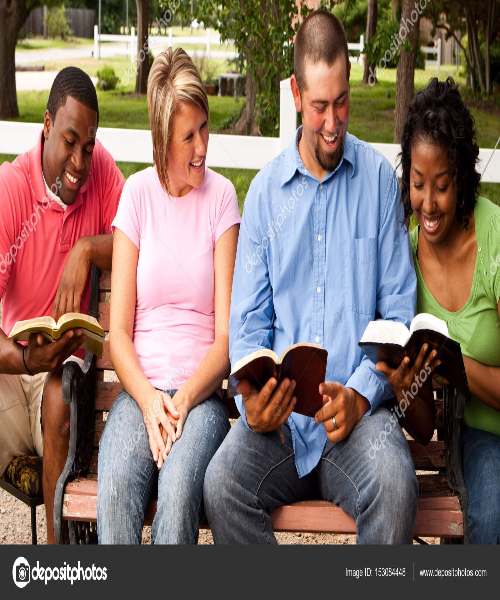

In [8]:
cv2_imshow(imagem)

In [9]:
imagem.shape

(600, 500, 3)

In [10]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [11]:
imagem_cinza.shape


(600, 500)

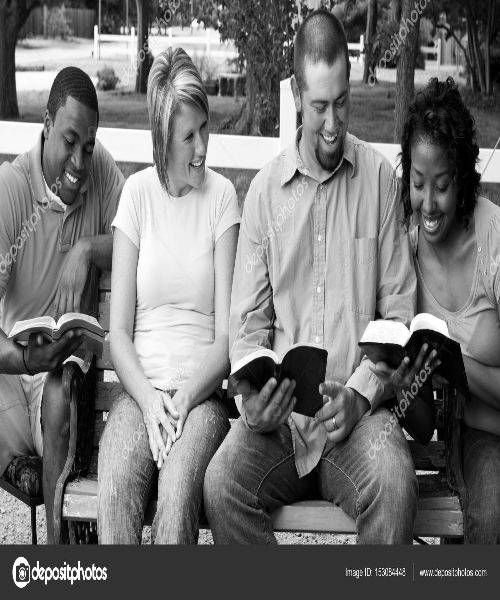

In [12]:
cv2_imshow(imagem_cinza)

## Identificador de rostos


In [13]:
detector_facial = cv2.CascadeClassifier('/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Cascades/haarcascade_frontalface_default.xml')

In [14]:
deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.2)

In [15]:
deteccoes

array([[  8,  25,  60,  60],
       [193, 130, 144, 144]], dtype=int32)

In [16]:
len(deteccoes)

2

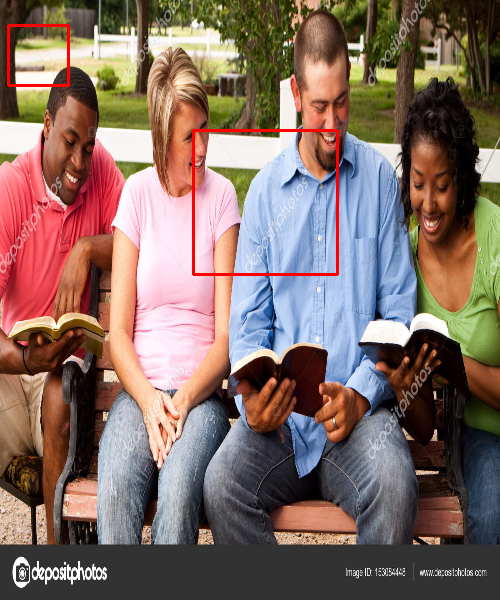

In [17]:
for x, y, w, h in deteccoes:
  cv2.rectangle(imagem, (x,y), (x + w,y + h), (0, 0, 255), 2)

cv2_imshow(imagem)


## Parametros para melhorar precisão

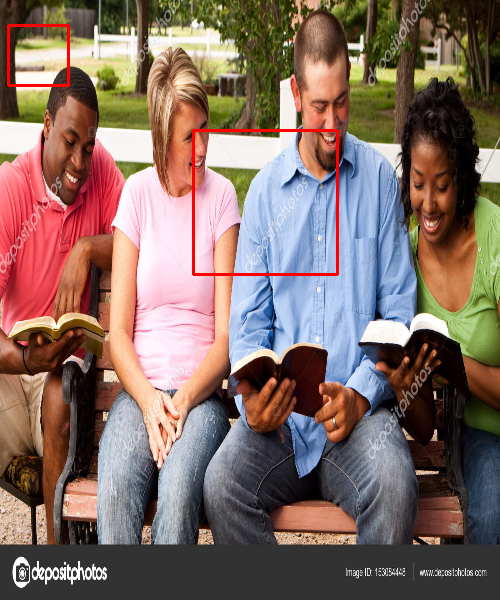

In [18]:
for x, y, w, h in deteccoes:
  cv2.rectangle(imagem, (x,y), (x + w,y + h), (0, 0, 255), 2)

cv2_imshow(imagem)

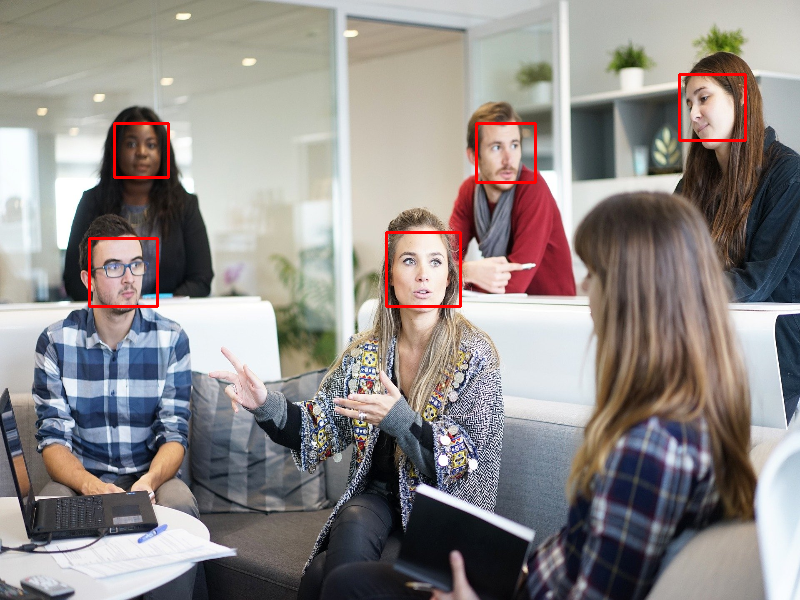

In [19]:
imagem2 = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/people1.jpg")
imagem2 = cv2.resize(imagem2, (800, 600))
imagem_cinza2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

detect = detector_facial.detectMultiScale(imagem_cinza2, scaleFactor=1.08)
for (x, y, w, h) in detect:
  cv2.rectangle(imagem2, (x,y), (x + w,y + h), (0, 0, 255), 2)

cv2_imshow(imagem2)


40 40
32 32
42 42
43 43
42 42
44 44
47 47
43 43
51 51
39 39
36 36


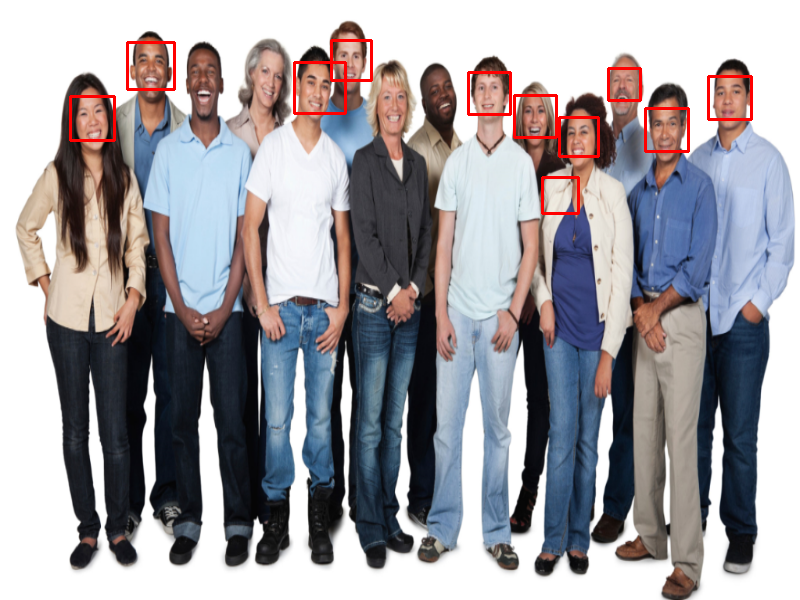

In [20]:
imagem2 = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/people2.jpg")
imagem2 = cv2.resize(imagem2, (800, 600))
imagem_cinza2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

detect = detector_facial.detectMultiScale(imagem_cinza2, scaleFactor=1.2, minNeighbors=3, minSize=(28,28), maxSize=(100,100))
for (x, y, w, h) in detect:
  print(w, h)
  cv2.rectangle(imagem2, (x,y), (x + w,y + h), (0, 0, 255), 2)

cv2_imshow(imagem2)


## Detecção de Olhos

In [21]:
detector_olhos = cv2.CascadeClassifier("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Cascades/haarcascade_eye.xml")

In [22]:
imagem2 = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/people1.jpg")
# imagem2 = cv2.resize(imagem2, (800, 600))
imagem_cinza2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

detect = detector_facial.detectMultiScale(imagem_cinza2, scaleFactor=1.3)
for (x, y, w, h) in detect:
  cv2.rectangle(imagem2, (x,y), (x + w,y + h), (0, 0, 255), 2)

deteccoes_olhos = detector_olhos.detectMultiScale(imagem_cinza2, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24), maxSize=(68, 68))

for x, y, w, h in deteccoes_olhos:
  print(w, h)
  cv2.rectangle(imagem2, (x,y), (x + w,y + h), (0, 255, 0), 2)

cv2_imshow(imagem2)


Output hidden; open in https://colab.research.google.com to view.

## Exercicio, classificador de carros

35 35
53 53
57 57
68 68
85 85
120 120
49 49
109 109
167 167


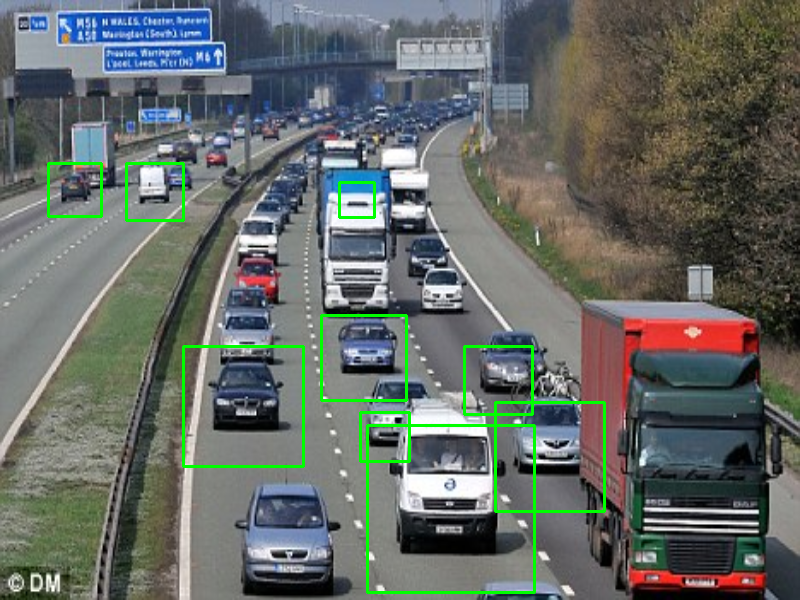

In [23]:
img_carros = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/car.jpg")
img_carros = cv2.resize(img_carros, (800, 600))
carros_cinza = cv2.cvtColor(img_carros, cv2.COLOR_BGR2GRAY)

detector_carros = cv2.CascadeClassifier("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Cascades/cars.xml")

detect_cars = detector_carros.detectMultiScale(carros_cinza, scaleFactor=1.08, minSize=(24, 24), minNeighbors=4)

for (x, y, w, h) in detect_cars:
  print(w, h)
  cv2.rectangle(img_carros, (x,y), (x + w,y + h), (0, 255, 0), 2)

cv2_imshow(img_carros)

## HOG - Histograms of Oriented Gradients

In [24]:
import dlib

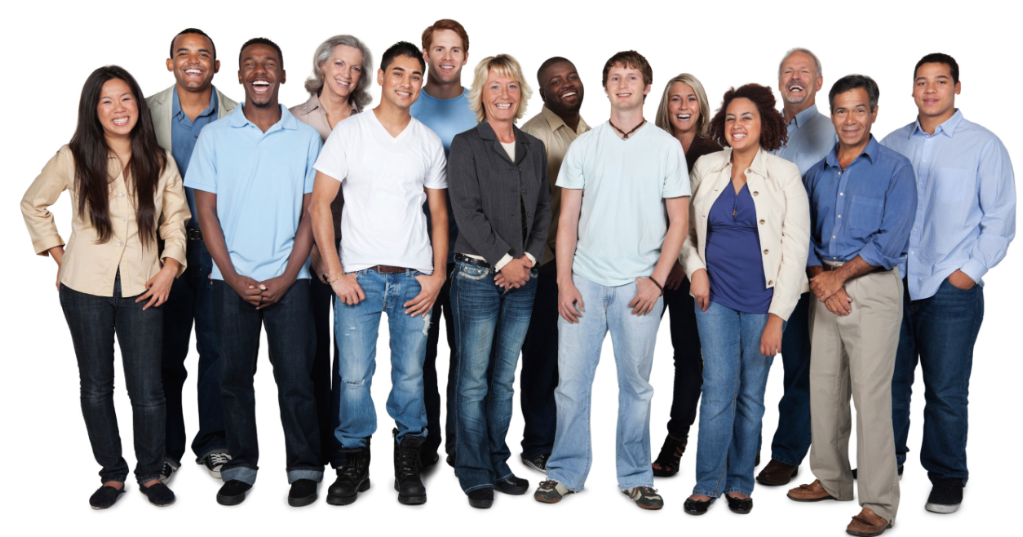

In [25]:
imagem = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/people2.jpg")

cv2_imshow(imagem)

In [26]:
detector_face_HOG = dlib.get_frontal_face_detector()

In [27]:
deteccoes_hog = detector_face_HOG(imagem, 1)

In [28]:
deteccoes_hog, len(deteccoes_hog)

(rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]],
 14)

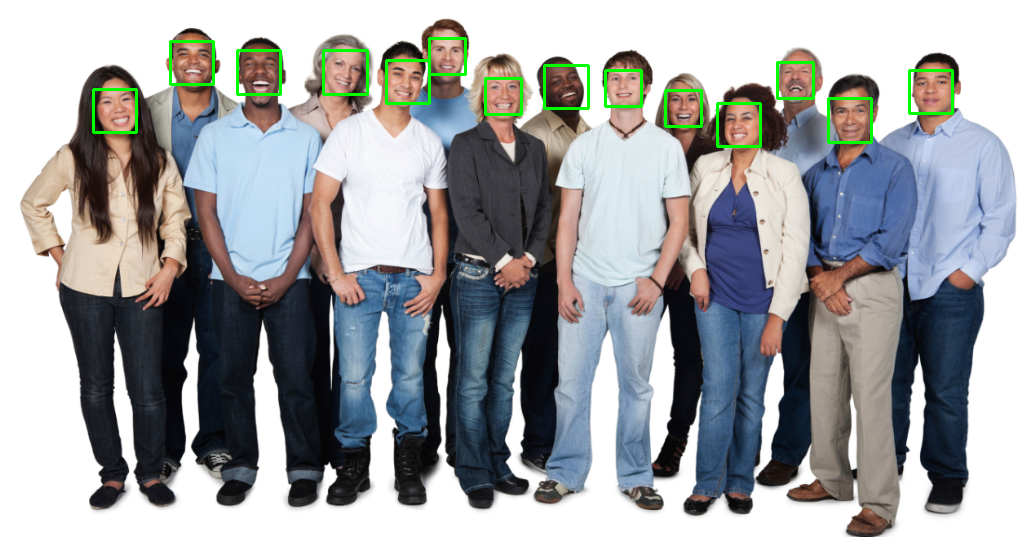

In [29]:
for face in deteccoes_hog:
  cv2.rectangle(imagem, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

cv2_imshow(imagem)

## Detecção de faces com CNN (Redes neurais convolucionais)

1.1440608501434326
1.1370506286621094
1.127898931503296
1.1200274229049683
1.1149379014968872
1.1131560802459717
1.0975687503814697
1.0942119359970093
1.0853146314620972
1.0801897048950195
1.0800751447677612
1.0784766674041748
1.0664023160934448
1.06417977809906


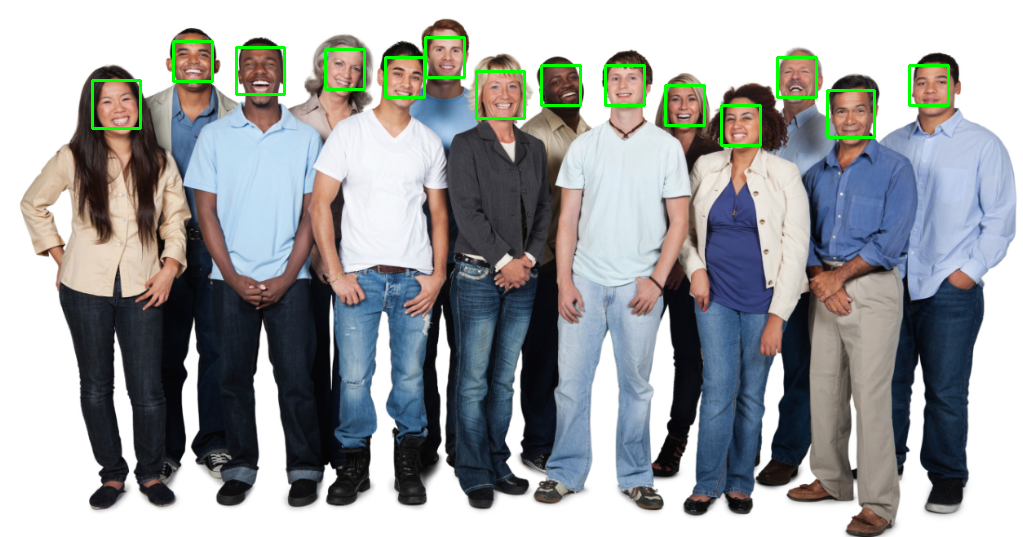

In [32]:
imagem = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/people2.jpg")

detector_face_cnn = dlib.cnn_face_detection_model_v1("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Weights/mmod_human_face_detector.dat")

deteccoes_cnn = detector_face_cnn(imagem, 1)

for face in deteccoes_cnn:
  left, top, right, bottom, acuraccy = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(acuraccy)
  cv2.rectangle(imagem, (left, top), (right, bottom), (0, 255, 0), 2)

cv2_imshow(imagem)

## Comparar algoritmos

### Haarcascade

In [69]:
imagem = cv2.imread("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/people3.jpg")


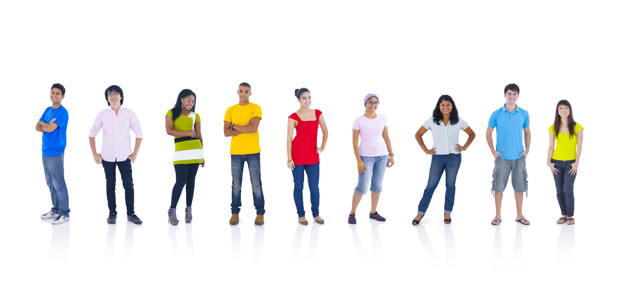

In [53]:
cv2_imshow(imagem)

26 26
25 25
26 26
25 25
30 30


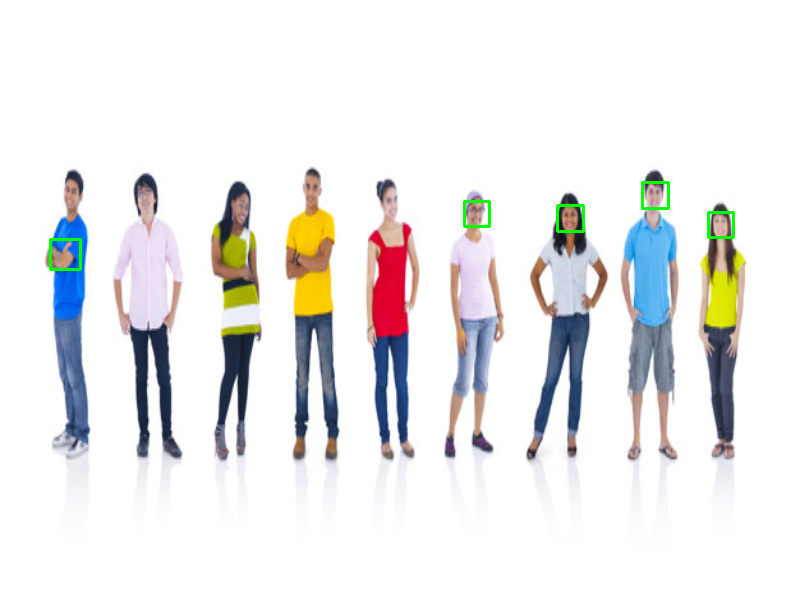

In [56]:
imagem = cv2.resize(imagem, (800, 600))
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

detector = cv2.CascadeClassifier("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Cascades/haarcascade_frontalface_default.xml")

detect = detector.detectMultiScale(imagem_cinza, scaleFactor=1.05)

for (x, y, w, h) in detect:
  print(w, h)
  cv2.rectangle(imagem, (x,y), (x + w,y + h), (0, 255, 0), 2)

cv2_imshow(imagem)

## HOG

In [62]:
detector_face_HOG = dlib.get_frontal_face_detector()

In [68]:
deteccoes_hog = detector_face_HOG(imagem, 4)

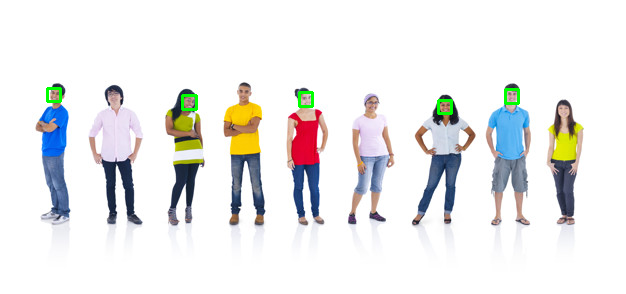

In [66]:
for face in deteccoes_hog:
  cv2.rectangle(imagem, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

cv2_imshow(imagem)

## CNN